## 載入所需圖片，並轉為灰階。

(597, 900)


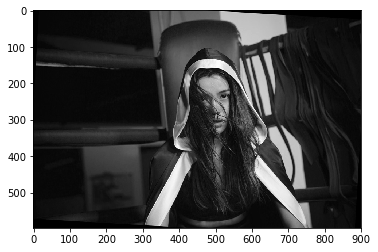

In [68]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy.linalg import solve
im = Image.open('fa.jpeg')

im = np.asarray(im.convert('L'))
print(im.shape)
plt.imshow(a)
plt.gray()
plt.show()

## 使用最接近像素，將影像作外插補

(601, 904)


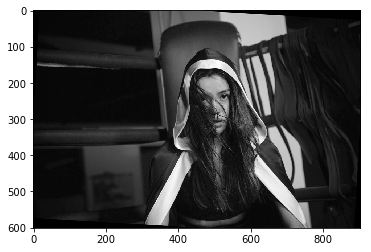

In [23]:
im_padding = np.lib.pad(im,2,'edge')
print(im_padding.shape)
plt.imshow(im_padding)
plt.gray()
plt.show()

## 最鄰近插補演算法

In [43]:
def nearest_neighbor_interpolation(image,scale):
    ## 宣告新圖片大小
    new_pic = np.ones((image.shape[0]*scale,image.shape[1]*scale))
    it = np.nditer(new_pic, flags=['multi_index'],op_flags=['readwrite'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


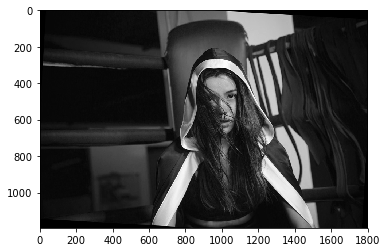

In [44]:
nearest_neighbor_interpolation(im,2)

## 雙立方插補

In [71]:
def bilinear_interpolation(image,scale):
    #宣告新圖片大小
    new_pic = np.zeros((image.shape[0]*scale,image.shape[1]*scale))
    im_padding = np.lib.pad(image,2,'edge')
    
    coeefficient_matrix = np.zeros((image.shape[0],image.shape[1],4))
    A = np.zeros((4,4))
    b = np.zeros(4)
    def get_vector_data(i,j):
        return np.array([i,j,i*j,1])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            A[0] = get_vector_data(i-1,j)
            A[1] = get_vector_data(i,j-1)
            A[2] = get_vector_data(i,j+1)
            A[3] = get_vector_data(i+1,j)
            b[0] = im_padding[i-1][j]
            b[1] = im_padding[i][j-1]
            b[2] = im_padding[i][j+1]
            b[3] = im_padding[i+1][j]
            coeefficient_matrix[i][j] = np.linalg.lstsq(A,b)[0]
#             print(coeefficient_matrix[i][j])
    it = np.nditer(new_pic, flags=['multi_index'],op_flags=['readwrite'])
    while not it.finished:
        map_index = [it.multi_index[0]/scale,it.multi_index[1]/scale]
        x = np.zeros(4)
        x = np.array([map_index[0],map_index[1],map_index[0]*map_index[1],1])
        
        it[0] = np.dot(coeefficient_matrix[map_index[0]][map_index[1]],np.transpose(x))
        it.iternext()
    img = Image.fromarray(new_pic).convert('L')
    img.save('lena_large.jpg')
    plt.imshow(new_pic)
    plt.gray()
    plt.show()

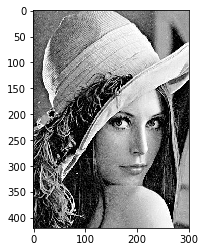

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


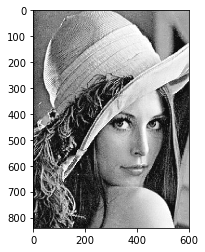

In [72]:
im2 = Image.open('lena.jpg')
im2 = np.asarray(im2.convert('L'))
plt.imshow(im2)
plt.gray()
plt.show()
bilinear_interpolation(im2,2)